# Functions

In the previous chapter we used several functions provided by Python, like `int` and `float`, and a few provided by the `math` module, like `sqrt` and `pow`.
In this chapter, you will learn how to create your own functions and run them.
And we'll see how one function can call another.
As examples, we'll display lyrics from Monty Python songs.
These silly examples demonstrate an important feature -- the ability to write your own functions is the foundation of programming.

This chapter also introduces a new statement, the `for` loop, which is used to repeat a computation.

### Before you start...

Once again, before working through the lesson, run the following code.

In [57]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py')

import thinkpython

Downloaded jupyturtle.py


## Defining new functions

A **function definition** specifies the name of a new function and the sequence of statements that run when the function is called. Here's an example:

In [30]:
def print_lyrics():
    print("I'm a lumberjack, and I'm okay.")
    print("I sleep all night and I work all day.")

`def` is a keyword that indicates that this is a function definition.
The name of the function is `print_lyrics`.
Anything that's a legal variable name is also a legal function name.

The empty parentheses after the name indicate that this function doesn't take any arguments.

The first line of the function definition is called the **header** -- the rest is called the **body**.
The header has to end with a colon and the body has to be indented. By convention, indentation is always four spaces.
The body of this function is two print statements; in general, the body of a function can contain any number of statements of any kind.

Defining a function creates a **function object**, which we can display like this.

In [31]:
print_lyrics

<function __main__.print_lyrics()>

The output indicates that `print_lyrics` is a function that takes no arguments.
`__main__` is the name of the module that contains `print_lyrics`.

Now that we've defined a function, we can call it the same way we call built-in functions.

In [32]:
print_lyrics()

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


When the function runs, it executes the statements in the body, which display the first two lines of "The Lumberjack Song".

## Parameters

Some of the functions we have seen require arguments; for example, when you call `abs` you pass a number as an argument.
Some functions take more than one argument; for example, `math.pow` takes two, the base and the exponent.

Here is a definition for a function that takes an argument.

In [33]:
def print_twice(string):
    print(string)
    print(string)

The variable name in parentheses is a **parameter**.
When the function is called, the value of the argument is assigned to the parameter.
For example, we can call `print_twice` like this.

In [34]:
print_twice('Dennis Moore, ')

Dennis Moore, 
Dennis Moore, 


Running this function has the same effect as assigning the argument to the parameter and then executing the body of the function, like this.

In [35]:
string = 'Dennis Moore, '
print(string)
print(string)

Dennis Moore, 
Dennis Moore, 


You can also use a variable as an argument.

In [36]:
line = 'Dennis Moore, '
print_twice(line)

Dennis Moore, 
Dennis Moore, 


In this example, the value of `line` gets assigned to the parameter `string`.

## Calling functions

Once you have defined a function, you can use it inside another function.
To demonstrate, we'll write functions that print the lyrics of "The Spam Song" (<https://www.songfacts.com/lyrics/monty-python/the-spam-song>).

> Spam, Spam, Spam, Spam,  
> Spam, Spam, Spam, Spam,  
> Spam, Spam,  
> (Lovely Spam, Wonderful Spam!)  
> Spam, Spam,

We'll start with the following function, which takes two parameters.


In [37]:
def repeat(word, n):
    print(word * n)

We can use this function to print the first line of the song, like this.

In [38]:
spam = 'Spam, '
repeat(spam, 4)

Spam, Spam, Spam, Spam, 


To display the first two lines, we can define a new function that uses `repeat`.

In [39]:
def first_two_lines():
    repeat(spam, 4)
    repeat(spam, 4)

And then call it like this.

In [40]:
first_two_lines()

Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 


To display the last three lines, we can define another function, which also uses `repeat`.

In [41]:
def last_three_lines():
    repeat(spam, 2)
    print('(Lovely Spam, Wonderful Spam!)')
    repeat(spam, 2)

In [42]:
last_three_lines()

Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 


Finally, we can bring it all together with one function that prints the whole verse.

In [43]:
def print_verse():
    first_two_lines()
    last_three_lines()

In [44]:
print_verse()

Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 


When we run `print_verse`, it calls `first_two_lines`, which calls `repeat`, which calls `print`.
That's a lot of functions.

Of course, we could have done the same thing with fewer functions, but the point of this example is to show how functions can work together.

## Repetition

If we want to display more than one verse, we can use a `for` statement.
Here's a simple example.

In [45]:
for i in range(2):
    print(i)

0
1


The first line is a header that ends with a colon.
The second line is the body, which has to be indented.

The header starts with the keyword `for`, a new variable named `i`, and another keyword, `in`.
It uses the `range` function to create a sequence of two values, which are `0` and `1`.
In Python, when we start counting, we usually start from `0`.

When the `for` statement runs, it assigns the first value from `range` to `i` and then runs the `print` function in the body, which displays `0`.

When it gets to the end of the body, it loops back around to the header, which is why this statement is called a **loop**.
The second time through the loop, it assigns the next value from `range` to `i`, and displays it.
Then, because that's the last value from `range`, the loop ends.

Here's how we can use a `for` loop to print two verses of the song.

In [46]:
for i in range(2):
    print("Verse", i)
    print_verse()
    print()

Verse 0
Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 

Verse 1
Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 



You can put a `for` loop inside a function.
For example, `print_n_verses` takes a parameter named `n`, which has to be an integer, and displays the given number of verses.

In [47]:
def print_n_verses(n):
    for i in range(n):
        print_verse()
        print()

In this example, we don't use `i` in the body of the loop, but there has to be a variable name in the header anyway.

## Variables and parameters are local

When you create a variable inside a function, it is **local**, which
means that it only exists inside the function.
For example, the following function takes two arguments, concatenates them, and prints the result twice.

In [48]:
def cat_twice(part1, part2):
    cat = part1 + part2
    print_twice(cat)

Here's an example that uses it:

In [49]:
line1 = 'Always look on the '
line2 = 'bright side of life.'
cat_twice(line1, line2)

Always look on the bright side of life.
Always look on the bright side of life.


When `cat_twice` runs, it creates a local variable named `cat`, which is destroyed when the function ends.
If we try to display it, we get a `NameError`:

In [50]:
%%expect NameError

print(cat)

NameError: name 'cat' is not defined

Outside of the function, `cat` is not defined.

Parameters are also local.
For example, outside `cat_twice`, there is no such thing as `part1` or `part2`.

## Stack diagrams

To keep track of which variables can be used where, it is sometimes useful to draw a **stack diagram**.
Like state diagrams, stack diagrams show the value of each variable, but they also show the function each variable belongs to.

Each function is represented by a **frame**.
A frame is a box with the name of a function on the outside and the parameters and local variables of the function on the inside.

Here's the stack diagram for the previous example.

In [51]:
from diagram import make_frame, Stack

d1 = dict(line1=line1, line2=line2)
frame1 = make_frame(d1, name='__main__', dy=-0.3, loc='left')

d2 = dict(part1=line1, part2=line2, cat=line1+line2)
frame2 = make_frame(d2, name='cat_twice', dy=-0.3,
                    offsetx=0.03, loc='left')

d3 = dict(string=line1+line2)
frame3 = make_frame(d3, name='print_twice',
                    offsetx=0.04, offsety=-0.3, loc='left')

d4 = {"?": line1+line2}
frame4 = make_frame(d4, name='print',
                    offsetx=-0.22, offsety=0, loc='left')

stack = Stack([frame1, frame2, frame3, frame4], dy=-0.8)

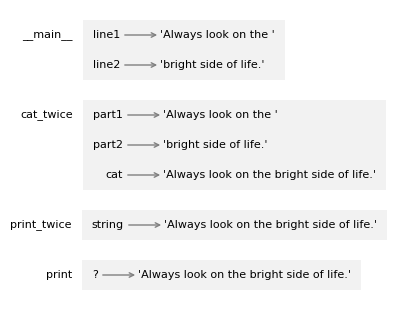

In [52]:
from diagram import diagram, adjust


width, height, x, y = [3.77, 2.9, 1.1, 2.65]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

import matplotlib.pyplot as plt
plt.savefig('chap03_stack_diagram.png', dpi=300)

The frames are arranged in a stack that indicates which function called
which, and so on. Reading from the bottom, `print` was called by `print_twice`, which was called by `cat_twice`, which was called by `__main__` -- which is a special name for the topmost frame.
When you create a variable outside of any function, it belongs to `__main__`.

In the frame for `print`, the question mark indicates that we don't know the name of the parameter.
If you are curious, ask a virtual assistant, "What are the parameters of the Python print function?"

## Tracebacks

When a runtime error occurs in a function, Python displays the name of the function that was running, the name of the function that called it, and so on, up the stack.
To see an example, I'll define a version of `print_twice` that contains an error -- it tries to print `cat`, which is a local variable in another function.

In [53]:
def print_twice(string):
    print(cat)            # NameError
    print(cat)

Now here's what happens when we run `cat_twice`.

In [54]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs, including a traceback.

%xmode Verbose

Exception reporting mode: Verbose


In [55]:
%%expect NameError

cat_twice(line1, line2)

NameError: name 'cat' is not defined

The error message includes a **traceback**, which shows the function that was running when the error occurred, the function that called it, and so on.
In this example, it shows that `cat_twice` called `print_twice`, and the error occurred in a `print_twice`.

The order of the functions in the traceback is the same as the order of the frames in the stack diagram.
The function that was running is at the bottom.

# Return Values

Some of the built-in functions we have used so far, like `abs`, `round`, `sqrt` and `pow`, return a value that you can assign to a variable or use as part of an expression.

The functions we have defined ourselves up to now do not return a value, they simply print something.  In this section, we'll see how to write functions that return a value.

## Some functions have return values

When you call a function like `math.sqrt`, the result is called a **return value**.
If the function call appears at the end of a cell, Jupyter displays the return value immediately.

In [ ]:
import math

math.sqrt(42 / math.pi)

If you assign the return value to a variable, it doesn't get displayed.

In [ ]:
radius = math.sqrt(42 / math.pi)

But you can display it later.

In [ ]:
radius

Or you can use the return value as part of an expression.

In [ ]:
radius + math.sqrt(42 / math.pi)

Here's an example of a function that returns a value.

In [ ]:
def circle_area(radius):
    area = math.pi * radius**2
    return area

`circle_area` takes `radius` as a parameter and computes the area of a circle with that radius.

The last line is a `return` statement that returns the value of `area`.

If we call the function like this, Jupyter displays the return value.


In [ ]:
circle_area(radius)

We can assign the return value to a variable.

In [ ]:
a = circle_area(radius)

Or use it as part of an expression.

In [ ]:
circle_area(radius) + 2 * circle_area(radius / 2)

Later we can display the value of the variable we assigned the result to.

In [ ]:
a

But we can't access `area`.

In [ ]:
%%expect NameError

area

`area` is a local variable in a function, so we can't access it from outside the function.

## And some have None

If a function doesn't have a `return` statement, it returns `None`, which is a special value in Python meaning that the object does not have a value.
For example, here's the `repeat` function from earlier.

In [ ]:
def repeat(word, n):
    print(word * n)

If we call it like this, it displays the first line of the Monty Python song "Finland".

In [ ]:
repeat('Finland, ', 3)

This function uses the `print` function to display a string, but it does not use a `return` statement to return a value.
If we assign the result to a variable, it displays the string anyway. 

In [ ]:
result = repeat('Finland, ', 3)

And if we display the value of the variable, we get nothing.

In [ ]:
result

`result` actually has a value, but Jupyter doesn't show it.
However, we can display it like this.

In [ ]:
print(result)

The return value from `repeat` is `None`.

Now here's a function similar to `repeat` except that has a return value.

In [ ]:
def repeat_string(word, n):
    return word * n

Notice that we can use an expression in a `return` statement, not just a variable.

With this version, we can assign the result to a variable.
When the function runs, it doesn't display anything.

In [ ]:
line = repeat_string('Spam, ', 4)

But later we can display the value assigned to `line`.

In [ ]:
line

A function like this is called a **pure function** because it doesn't display anything or have any other effect -- other than returning a value.  When a function does something besides returning a value, the thing it does is called a **side effect**.  In the `repeat` function defined above printing the word repeatedly is the side effect.  In good code design (at our level of coding), functions should either be pure functions (only return something, no side effects) or be side effect functions (only have a side effect, and return `None`).

## Why functions?

It may not be clear yet why it is worth the trouble to divide a program into
functions.
There are several reasons:

-   Creating a new function gives you an opportunity to name a group of
    statements, which makes your program easier to read and debug.

-   Functions can make a program smaller by eliminating repetitive code.
    Later, if you make a change, you only have to make it in one place.

-   Dividing a long program into functions allows you to debug the parts
    one at a time and then assemble them into a working whole.

-   Well-designed functions are often useful for many programs. Once you
    write and debug one, you can reuse it.

## Debugging

Debugging can be frustrating, but it is also challenging, interesting, and sometimes even fun.
And it is one of the most important skills you can learn.

In some ways debugging is like detective work.
You are given clues and you have to infer the events that led to the
results you see.

Debugging is also like experimental science.
Once you have an idea about what is going wrong, you modify your program and try again.
If your hypothesis was correct, you can predict the result of the modification, and you take a step closer to a working program.
If your hypothesis was wrong, you have to come up with a new one.

For some people, programming and debugging are the same thing; that is, programming is the process of gradually debugging a program until it does what you want.
The idea is that you should start with a working program and make small modifications, debugging them as you go.

If you find yourself spending a lot of time debugging, that is often a sign that you are writing too much code before you start tests.
If you take smaller steps, you might find that you can move faster.

# Functions and Interfaces

This chapter introduces a module called `jupyturtle`, which allows you to create simple drawings by giving instructions to an imaginary turtle.
We will use this module to write functions that draw squares, polygons, and circles -- and to demonstrate **interface design**, which is a way of designing functions that work together.

## The jupyturtle module

To use the `jupyturtle` module, we can import it like this.

In [58]:
import jupyturtle

Now we can use the functions defined in the module, like `make_turtle` and `forward`.

In [59]:
jupyturtle.make_turtle()
jupyturtle.forward(100)

`make_turtle` creates a **canvas**, which is a space on the screen where we can draw, and a turtle, which is represented by a circular shell and a triangular head.
The circle shows the location of the turtle and the triangle indicates the direction it is facing.

`forward` moves the turtle a given distance in the direction it's facing, drawing a line segment along the way.
The distance is in arbitrary units -- the actual size depends on your computer's screen.

We will use functions defined in the `jupyturtle` module many times, so it would be nice if we did not have to write the name of the module every time.
That's possible if we import the module like this.

In [60]:
from jupyturtle import make_turtle, forward

This version of the import statement imports `make_turtle` and `forward` from the `jupyturtle` module so we can call them like this.

In [61]:
make_turtle()
forward(100)

`jupyturtle` provides two other functions we'll use, called `left` and `right`.
We'll import them like this.

In [62]:
from jupyturtle import left, right

`left` causes the turtle to turn left. It takes one argument, which is the angle of the turn in degrees.
For example, we can make a 90 degree left turn like this.

In [63]:
make_turtle()
forward(50)
left(90)
forward(50)

This program moves the turtle east and then north, leaving two line segments behind.
Before you go on, see if you can modify the previous program to make a square.

## Making a square

Here's one way to make a square.

In [64]:
make_turtle()

forward(50)
left(90)

forward(50)
left(90)

forward(50)
left(90)

forward(50)
left(90)

Because this program repeats the same pair of lines four times, we can do the same thing more concisely with a `for` loop.

In [65]:
make_turtle()
for i in range(4):
    forward(50)
    left(90)

## Encapsulation and generalization

Let's take the square-drawing code from the previous section and put it in a function called `square`.

In [66]:
def square():
    for i in range(4):
        forward(50)
        left(90)

Now we can call the function like this.

In [67]:
make_turtle()
square()

Wrapping a piece of code up in a function is called **encapsulation**.
One of the benefits of encapsulation is that it attaches a name to the code, which serves as a kind of documentation. Another advantage is that if you re-use the code, it is more concise to call a function twice than to copy and paste the body!

In the current version, the size of the square is always `50`.
If we want to draw squares with different sizes, we can take the length of the sides as a parameter.

In [68]:
def square(length):
    for i in range(4):
        forward(length)
        left(90)

Now we can draw squares with different sizes.

In [69]:
make_turtle()
square(30)
square(60)

Adding a parameter to a function is called **generalization** because it makes the function more general: with the previous version, the square is always the same size; with this version it can be any size.

If we add another parameter, we can make it even more general.
The following function draws regular polygons with a given number of sides.

In [70]:
def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)

In a regular polygon with `n` sides, the angle between adjacent sides is `360 / n` degrees.

The following example draws a `7`-sided polygon with side length `30`.

In [71]:
make_turtle()
polygon(7, 30)

When a function has more than a few numeric arguments, it is easy to forget what they are, or what order they should be in.
It can be a good idea to include the names of the parameters in the argument list.

In [72]:
make_turtle()
polygon(n=7, length=30)

These are sometimes called "named arguments" because they include the parameter names.
But in Python they are more often called **keyword arguments** (not to be confused with Python keywords like `for` and `def`).

This use of the assignment operator, `=`, is a reminder about how arguments and parameters work -- when you call a function, the arguments are assigned to the parameters.

## Approximating a circle

Now suppose we want to draw a circle.
We can do that, approximately, by drawing a polygon with a large number of sides, so each side is small enough that it's hard to see.
Here is a function that uses `polygon` to draw a `30`-sided polygon that approximates a circle.

In [73]:
import math

def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

`circle` takes the radius of the the circle as a parameter.
It computes `circumference`, which is the circumference of a circle with the given radius.
`n` is the number of sides, so `circumference / n` is the length of each side.

This function might take a long time to run.
We can speed it up by calling `make_turtle` with a keyword argument called `delay` that sets the time, in seconds, the turtle waits after each step.
The default value is `0.2` seconds -- if we set it to `0.02` it runs about 10 times faster.

In [74]:
make_turtle(delay=0.02)
circle(30)

A limitation of this solution is that `n` is a constant, which means
that for very big circles, the sides are too long, and for small
circles, we waste time drawing very short sides.
One option is to generalize the function by taking `n` as a parameter.
But let's keep it simple for now.

## Refactoring

Now let's write a more general version of `circle`, called `arc`, that takes a second parameter, `angle`, and draws an arc of a circle that spans the given angle.
For example, if `angle` is `360` degrees, it draws a complete circle. If `angle` is `180` degrees, it draws a half circle.

To write `circle`, we were able to reuse `polygon`, because a many-sided polygon is a good approximation of a circle.
But we can't use `polygon` to write `arc`.

Instead, we'll create the more general version of `polygon`, called `polyline`.

In [75]:
def polyline(n, length, angle):
    for i in range(n):
        forward(length)
        left(angle)

`polyline` takes as parameters the number of line segments to draw, `n`, the length of the segments, `length`, and the angle between them, `angle`.

Now we can rewrite `polygon` to use `polyline`.

In [76]:
def polygon(n, length):
    angle = 360.0 / n
    polyline(n, length, angle)

And we can use `polyline` to write `arc`.

In [77]:
def arc(radius, angle):
    arc_length = 2 * math.pi * radius * angle / 360
    n = 30
    length = arc_length / n
    step_angle = angle / n
    polyline(n, length, step_angle)

`arc` is similar to `circle`, except that it computes `arc_length`, which is a fraction of the circumference of a circle.

Finally, we can rewrite `circle` to use `arc`.

In [78]:
def circle(radius):
    arc(radius,  360)

To check that these functions work as expected, we'll use them to draw something like a snail.
With `delay=0`, the turtle runs as fast as possible.

In [79]:
make_turtle(delay=0)
polygon(n=20, length=9)
arc(radius=70, angle=70)
circle(radius=10)

In this example, we started with working code and reorganized it with different functions.
Changes like this, which improve the code without changing its behavior, are called **refactoring**.

If we had planned ahead, we might have written `polyline` first and avoided refactoring, but often you don't know enough at the beginning of a project to design all the functions.
Once you start coding, you understand the problem better.
Sometimes refactoring is a sign that you have learned something.

## Stack diagram

When we call `circle`, it calls `arc`, which calls `polyline`.
We can use a stack diagram to show this sequence of function calls and the parameters for each one.

In [80]:
from diagram import make_binding, make_frame, Frame, Stack

frame1 = make_frame(dict(radius=30), name='circle', loc='left')

frame2 = make_frame(dict(radius=30, angle=360), name='arc', loc='left', dx=1.1)

frame3 = make_frame(dict(n=60, length=3.04, angle=5.8),
                    name='polyline', loc='left', dx=1.1, offsetx=-0.27)

stack = Stack([frame1, frame2, frame3], dy=-0.4)

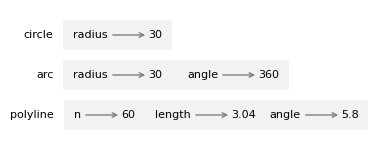

In [81]:
from diagram import diagram, adjust

width, height, x, y = [3.58, 1.31, 0.98, 1.06]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
#adjust(x, y, bbox)

Notice that the value of `angle` in `polyline` is different from the value of `angle` in `arc`.
Parameters are local, which means you can use the same parameter name in different functions; it's a different variable in each function, and it can refer to a different value.

## A development plan

A **development plan** is a process for writing programs.
The process we used in this chapter is "encapsulation and generalization".
The steps of this process are:

1.  Start by writing a small program with no function definitions.

2.  Once you get the program working, identify a coherent piece of it,
    encapsulate the piece in a function and give it a name.

3.  Generalize the function by adding appropriate parameters.

4.  Repeat Steps 1 to 3 until you have a set of working functions.

5.  Look for opportunities to improve the program by refactoring. For
    example, if you have similar code in several places, consider
    factoring it into an appropriately general function.

This process has some drawbacks -- we will see alternatives later -- but it can be useful if you don't know ahead of time how to divide the program into functions.
This approach lets you design as you go along.

The design of a function has two parts:

* The **interface** is how the function is used, including its name, the parameters it takes and what the function is supposed to do.

* The **implementation** is how the function does what it's supposed to do.

For example, here's the first version of `circle` we wrote, which uses `polygon`.

In [82]:
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

And here's the refactored version that uses `arc`.

In [83]:
def circle(radius):
    arc(radius,  360)

These two functions have the same interface -- they take the same parameters and do the same thing -- but they have different implementations.

## Docstrings

A **docstring** is a string at the beginning of a function that explains the interface ("doc" is short for "documentation").
Here is an example:

In [ ]:
def polyline(n, length, angle):
    """Draws line segments with the given length and angle between them.

    n: integer number of line segments
    length: length of the line segments
    angle: angle between segments (in degrees)
    """
    for i in range(n):
        forward(length)
        left(angle)

By convention, docstrings are triple-quoted strings, also known as **multiline strings** because the triple quotes allow the string to span more than one line.

A docstring should:

* Explain concisely what the function does, without getting into the details of how it works,

* Explain what effect each parameter has on the behavior of the function, and

* Indicate what type each parameter should be, if it is not obvious.

Writing this kind of documentation is an important part of interface design.
A well-designed interface should be simple to explain; if you have a hard time explaining one of your functions, maybe the interface could be improved.

## Glossary

**function definition:**
A statement that creates a function.

**header:**
 The first line of a function definition.

**body:**
 The sequence of statements inside a function definition.

**function object:**
A value created by a function definition.
The name of the function is a variable that refers to a function object.

**parameter:**
 A name used inside a function to refer to the value passed as an argument.

**return value:**
The result of a function. If a function call is used as an expression, the return value is the value of the expression.

**pure function:**
A function that does not display anything or have any other effect, other than returning a return value.

** side effect:**
Something a function does besides than returning value.

**loop:**
 A statement that runs one or more statements, often repeatedly.

**local variable:**
A variable defined inside a function, and which can only be accessed inside the function.

**stack diagram:**
A graphical representation of a stack of functions, their variables, and the values they refer to.

**frame:**
 A box in a stack diagram that represents a function call.
 It contains the local variables and parameters of the function.

**traceback:**
 A list of the functions that are executing, printed when an exception occurs.

## Exercises

In [ ]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

### Ask a virtual assistant

The statements in a function or a `for` loop are indented by four spaces, by convention.
But not everyone agrees with that convention.
If you are curious about the history of this great debate, ask a virtual assistant to "tell me about spaces and tabs in Python".

Virtual assistant are pretty good at writing small functions.

1. Ask your favorite VA to "Write a function called repeat that takes a string and an integer and prints the string the given number of times."

2. If the result uses a `for` loop, you could ask, "Can you do it without a for loop?"

3. Pick any other function in this chapter and ask a VA to write it. The challenge is to describe the function precisely enough to get what you want. Use the vocabulary you have learned so far in this book.

Virtual assistants are also pretty good at debugging functions.

1. Ask a VA what's wrong with this version of `print_twice`.

    ```
    def print_twice(string):
        print(cat)
        print(cat)
    ```
    
And if you get stuck on any of the exercises below, consider asking a VA for help.

### Exercise

Write a function named `print_right` that takes a string named `text` as a parameter and prints the string with enough leading spaces that the last letter of the string is in the 40th column of the display.

In [ ]:
# Solution goes here

Hint: Use the `len` function, the string concatenation operator (`+`) and the string repetition operator (`*`).

Here's an example that shows how it should work.

In [ ]:
print_right("Monty")
print_right("Python's")
print_right("Flying Circus")

### Exercise

Write a function called `triangle` that takes a string and an integer and draws a pyramid with the given height, made up using copies of the string. Here's an example of a pyramid with `5` levels, using the string `'L'`.

In [ ]:
# Solution goes here

In [ ]:
triangle('L', 5)

### Exercise

Write a function called `rectangle` that takes a string and two integers and draws a rectangle with the given width and height, made up using copies of the string. Here's an example of a rectangle with width `5` and height `4`, made up of the string `'H'`.

In [ ]:
# Solution goes here

In [ ]:
rectangle('H', 5, 4)

### Exercise

The song "99 Bottles of Beer" starts with this verse:

> 99 bottles of beer on the wall  
> 99 bottles of beer  
> Take one down, pass it around  
> 98 bottles of beer on the wall  

Then the second verse is the same, except that it starts with 98 bottles and ends with 97. The song continues -- for a very long time -- until there are 0 bottles of beer.

Write a function called `bottle_verse` that takes a number as a parameter and displays the verse that starts with the given number of bottles.

Hint: Consider starting with a function that can print the first, second, or last line of the verse, and then use it to write `bottle_verse`.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

Use this function call to display the first verse.

In [ ]:
bottle_verse(99)

If you want to print the whole song, you can use this `for` loop, which counts down from `99` to `1`.
You don't have to completely understand this example---we'll learn more about `for` loops and the `range` function later.

In [ ]:
for n in range(99, 0, -1):
    bottle_verse(n)
    print()

Add exercises using pure functions...

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com), modified by Andrew Hamilton (2026)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)